In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
file = 'iris.xlsx'
df = pd.read_excel (file) 
iris_df = pd.DataFrame(df,columns = ['sepal_length','sepal_width','petal_length','petal_width','label'])

In [10]:
iris_df.iloc[[107,94]]

,sepal_length,sepal_width,petal_length,petal_width,label
107,7.3,2.9,6.3,1.8,virginica
94,5.6,2.7,4.2,1.3,versicolor


In [78]:
def standardize(col):
    return (col-col.mean())/col.std()
iris_virgi = iris_df.copy()
iris_virgi['label'] = iris_virgi.label.replace({'setosa':0,'virginica':1,'versicolor':0})
iris_virgi[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = iris_virgi[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(standardize,axis = 0)


In [5]:
iris_virgi = iris_virgi.iloc[np.random.permutation(len(df))]

In [6]:
iris_virgi.head()

,sepal_length,sepal_width,petal_length,petal_width,label
73,0.309959,-0.590395,0.533621,0.000875,0
107,1.759119,-0.360967,1.439983,0.788031,1
138,0.189196,-0.131539,0.590269,0.788031,1
94,-0.293857,-0.819823,0.250383,0.132067,0
124,1.034539,0.556746,1.100097,1.181609,1


## Batch Perceptron learning

In [79]:
np.random.seed(42)
w_ini = np.random.randn(5,)
learning_rate = 0.01
X = iris_virgi[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_virgi[['label']].values

In [12]:
X_copy = np.copy(X)
X_copy = X_copy.T
X_copy = np.vstack([X_copy,np.ones((1,X_copy.shape[1]))])
X_copy[:,y[:,0] == 0] = X_copy[:,y[:,0] == 0] *(-1)
w = w_ini
w

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

In [13]:
c = 0
while True:
    c += 1
    res = np.dot(w,X_copy[:,:])
    indices = np.where(res <= 0)[0]
    #print(indices)
    if len(indices) == 0: break
    wrongs = X_copy[:,indices]
    summed = np.sum(wrongs,axis=1)
    w = w + learning_rate*summed
    if c == 1000:
        break
    #print(summed)
print(w)
print(c)

[-0.03951516 -0.0552419   0.43148711  0.27518634 -0.46415337]
1000


In [80]:
X = X.T # making 5x150
X = np.vstack([X,np.ones((1,X.shape[1]))])
results = np.dot(w,X)
y = y.T
((results > 1) == (y == 1)).sum()

NameError: name 'w' is not defined

## Least Squares

In [82]:
y.shape

(150, 1)

In [83]:
X2 = X.T # making 150x5
y2 = y # same as above
W = np.matmul(np.linalg.pinv(X2),y2)
print(W)

[[-0.03798843]
 [ 0.0883799 ]
 [ 0.00703985]
 [ 0.42058699]
 [ 0.33333333]]


In [84]:
results_LS = np.dot(X2,W)
((results_LS > 0) == (y2 == 1)).sum()

91

# Virgi vs Rest using features 3 & 4

In [85]:
iris_virgi_2 = iris_df[['petal_length','petal_width','label']].copy()
iris_virgi_2['label'] = iris_virgi_2.label.replace({'setosa':0,'virginica':1,'versicolor':0})
iris_virgi_2[['petal_length', 'petal_width']] = iris_virgi_2[['petal_length', 'petal_width']].apply(standardize,axis = 0)
iris_virgi_2 = iris_virgi_2.iloc[np.random.permutation(len(df))]
X2 = iris_virgi_2[['petal_length', 'petal_width']].values
y2 = iris_virgi_2[['label']].values

In [13]:
X2_copy = np.copy(X2)
X2_copy = X2_copy.T
#print(X_copy.shape)
X2_copy = np.vstack([X2_copy,np.ones((1,X2_copy.shape[1]))])
X2_copy[:,y2[:,0] == 0] = X2_copy[:,y2[:,0] == 0] *(-1)
np.random.seed(42)
w2 = np.random.randn(3,)

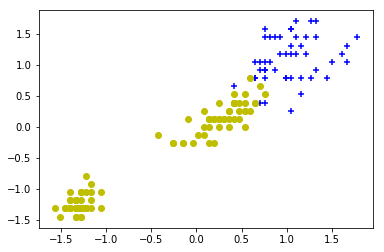

In [24]:
# y2 = y2.T
# X2 = X2.T
plt.scatter(X2[0,y2[0]==1],X2[1,y2[0]==1],c='b',marker="+") #Since y is 2D need y[0] is used y2 then could have done y==1
plt.scatter(X2[0,y2[0]==0],X2[1,y2[0]==0],c='y',marker="o")
#y2[0]

In [9]:
c = 0
while True:
    c += 1
    res = np.dot(w2,X2_copy[:,:])
    indices = np.where(res <= 0)[0]
    #print(indices)
    if len(indices) == 0: break
    wrongs = X2_copy[:,indices]
    summed = np.sum(wrongs,axis=1)
    w2 = w2 + learning_rate*summed
    #print(summed)
print(w2)
print(c)

NameError: name 'learning_rate' is not defined

In [87]:
y2.shape

(150, 1)

In [88]:
# X2 = X2.T # making 150x5
# y2 = y2.T # same as above
X2 = np.hstack([X2,np.ones((X2.shape[0],1))])
W2 = np.matmul(np.linalg.pinv(X2),y2)
print(W2)


[[-0.12887756]
 [ 0.48802669]
 [ 0.33333333]]


In [89]:
results2_LS = np.dot(X2,W2)
((results2_LS > 0) == (y2 == 1)).sum()

97

In [64]:
X2 = X2.T

In [66]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
xx,yy = make_meshgrid(X2[0,:],X2[1,:])

X_mesh = np.vstack([xx.ravel().T,yy.ravel().T,np.ones(xx.shape[0]*xx.shape[1])])
X_mesh.shape
W2 = W2.reshape(3,)
clf = np.dot(W2,X_mesh)

In [69]:
X2 = X2.reshape((150,3))
W2 = W2.reshape((3,1))
results2 = np.dot(X2,W2)

In [75]:
((results2 > 0) == (y2 == 1)).sum()


75

In [72]:
y2 = y2.T

In [65]:
X2.shape

(3, 150)

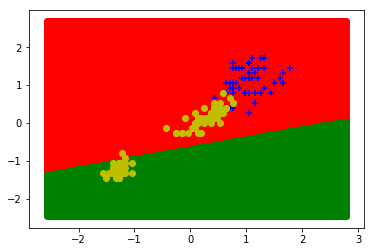

In [67]:
# X2 = X2.T
plt.scatter(X_mesh[0,clf > 0],X_mesh[1,clf > 0],c='r')
plt.scatter(X_mesh[0,clf <= 0],X_mesh[1,clf <= 0],c='g')
plt.scatter(X2[0,y2[0]==1],X2[1,y2[0]==1],c='b',marker="+") #Since y is 2D need y[0] is used y2 then could have done y==1
plt.scatter(X2[0,y2[0]==0],X2[1,y2[0]==0],c='y',marker="o")